In [179]:
# ML_HW4 - Amirreza Eftekhari - 99243014

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [147]:
df1 = pd.read_csv('/content/drive/MyDrive/ML/d1.csv')

In [148]:
df1.head()

,x,y
0,0.438595,0.215316
1,-0.422453,-0.305440
2,-1.012481,0.047559
3,0.976358,0.038049
4,-1.016175,-0.277860


In [149]:
df2 = pd.read_csv('/content/drive/MyDrive/ML/d2.csv')

In [150]:
df2.head()

,x,y
0,0.064928,0.149214
1,1.294972,-0.457130
2,0.034000,0.937492
3,0.976778,0.021321
4,-0.200670,0.992690


In [151]:
x1 = df1['x'].tolist()
y1 = df1['y'].tolist()

In [152]:
x2 = df2['x'].tolist()
y2 = df2['y'].tolist()

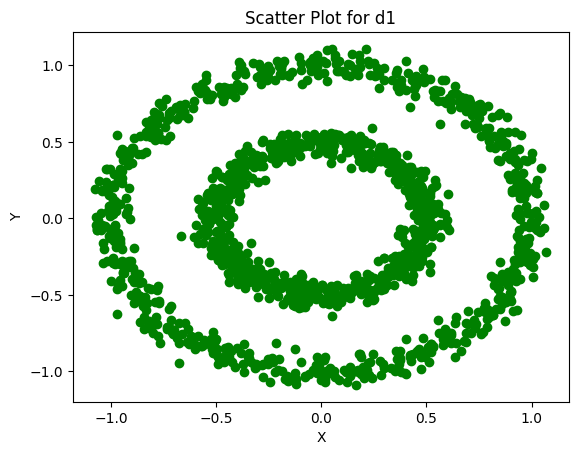

In [153]:
plt.scatter(x1, y1, color='green')
plt.title('Scatter Plot for d1')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

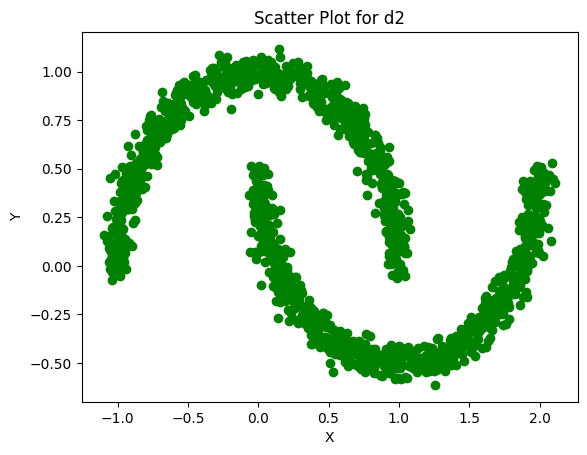

In [154]:
plt.scatter(x2, y2, color='green')
plt.title('Scatter Plot for d2')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [155]:
data1 = np.column_stack((x1, y1)) # combine x1 and y1 into a two-dimensional array
data2 = np.column_stack((x2, y2)) # combine x2 and y2 into a two-dimensional array

In [156]:
def dist(x, y): # calculate distance between two points
  return np.linalg.norm(x-y)

In [157]:
def find_neigh(data, point, eps): # find the neighbors of a point
  neighbors = [np.where(data == d)[0][0] for d in data if dist(d, point) <= eps]
  return neighbors

In [158]:
def dbscan(data, eps, min_samples):
    labels = np.zeros(len(data))
    cluster_id = 0
    i = 0
    while i < len(data):
      if labels[i] == 0:
        neighbors = find_neigh(data, data[i], eps)

        if len(neighbors) < min_samples: # the point is outlier
          labels[i] = -1

        else: # assign the point in a new cluster and expand it
          cluster_id += 1
          labels[i] = cluster_id
          index = 0
          len_neighbs = len(neighbors)

          while index < len_neighbs:
            point = neighbors[index]
            if labels[point] <= 0:
              if labels[point] == 0:
                new_neighbors = find_neigh(data, data[point], eps)
                if len(new_neighbors) >= min_samples:
                  neighbors += new_neighbors
                  len_neighbs += len(new_neighbors)
              labels[point] = cluster_id
            index += 1

      i += 1

    return labels

In [176]:
eps = 0.1
min_samples = 5
labels1 = dbscan(data1, eps, min_samples)
labels2 = dbscan(data2, eps, min_samples)

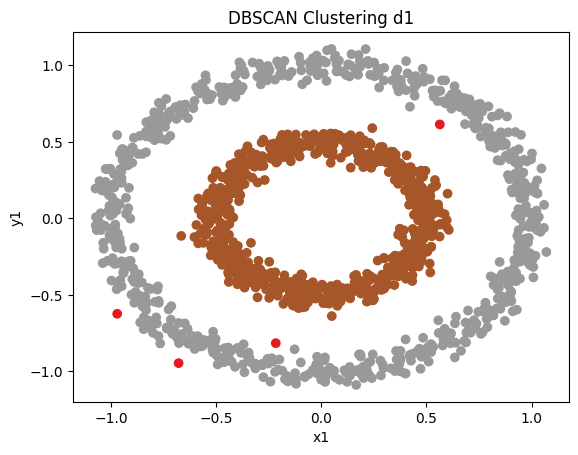

In [177]:
plt.scatter(x1, y1, c=labels1, cmap='Set1')
plt.title('DBSCAN Clustering d1')
plt.xlabel('x1')
plt.ylabel('y1')
plt.show()

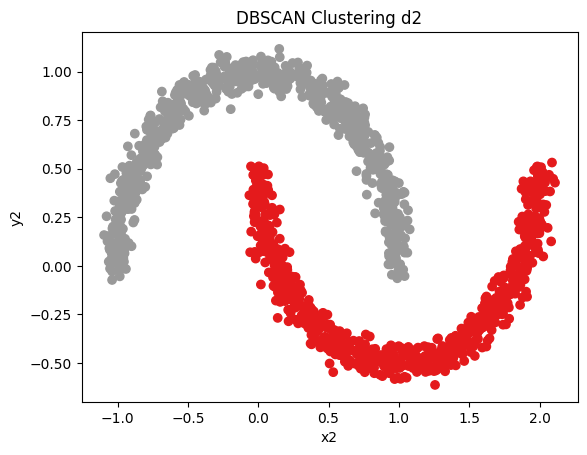

In [178]:
plt.scatter(x2, y2, c=labels2, cmap='Set1')
plt.title('DBSCAN Clustering d2')
plt.xlabel('x2')
plt.ylabel('y2')
plt.show()